In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cnn_weights = "/content/drive/MyDrive/models/chest_xray_normal_pneumonia/normal_pneumonia_256_resolution/resnet50_normal_pneumonia_256_resolution.pth"
gan_network = "/content/drive/MyDrive/models/chest_xray_normal_pneumonia/normal_pneumonia_256_resolution/generator_normal_pneumonia_256.pkl"
class_activations = "/content/drive/MyDrive/models/chest_xray_normal_pneumonia/normal_pneumonia_256_resolution/class_activations_resnet50_pneumonia_256.pickle"

In [3]:
!git clone https://github.com/dvschultz/stylegan2-ada-pytorch

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 577, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 577 (delta 22), reused 21 (delta 17), pack-reused 544 (from 1)
Receiving objects: 100% (577/577), 8.43 MiB | 13.02 MiB/s, done.
Resolving deltas: 100% (330/330), done.


In [4]:
import os
!mkdir -p ~/.kaggle/
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c rsna-pneumonia-detection-challenge
#!kaggle datasets download -d tobiassilalahi/oct-images-normalize-zip
!unzip \*.zip && rm *.zip

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: stage_2_train_images/d5231546-354e-4071-9af1-6644beabfd86.dcm  
  inflating: stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: stage_2_train_images/d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc.dcm  
  inflating: stage_2_

In [6]:
%cd /content/drive/MyDrive/medical_image_counterfactuals
from setup_environment import setup_libraries
setup_libraries()

/content/drive/MyDrive/medical_image_counterfactuals
Installing pytorch_lightning...
Installing pydicom...
Installing opensimplex...
Installing click, requests, tqdm, pyspng, ninja, imageio-ffmpeg...
Installing piq...
Installing openai-clip
All packages have been installed.


Using device: cuda


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 209MB/s]
Processing batches:  14%|█▍        | 13/93 [00:04<00:29,  2.73it/s]

Total correctly classified images saved: 150
True label: 1, Predicted label: 1


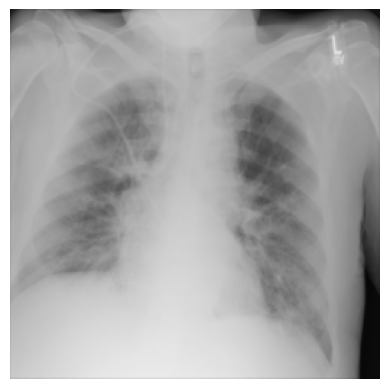

The class probabilities of the image are: [2.0182939e-05 9.9997985e-01]


<Figure size 640x480 with 0 Axes>

In [7]:
%run /content/drive/MyDrive/medical_image_counterfactuals/pick_an_image.py --num_classes 2 --selected_image 49 --dataset_name chest_xray --image_size 256 --data_dir "/content/stage_2_train_images" --model_type resnet50 --model_weights=$cnn_weights  --original_class 1 --output_path "/content/drive/MyDrive/output_image.png"


In [8]:
%cd /content/drive/MyDrive/stylegan2-ada-pytorch

/content/drive/MyDrive/stylegan2-ada-pytorch


In [9]:
!python pbaylies_projector.py --outdir=out --target-image='/content/drive/MyDrive/output_image.png' \
    --network=$gan_network --seed=5 --num-steps=1000 --save-video=False

Loading networks from "/content/drive/MyDrive/models/chest_xray_normal_pneumonia/normal_pneumonia_256_resolution/generator_normal_pneumonia_256.pkl"...
Computing W midpoint and stddev using 8192 samples...
Setting up PyTorch plugin "bias_act_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
100%|███████████████████████████████████████| 338M/338M [00:14<00:00, 24.7MiB/s]
Setting up PyTorch plugin "upfirdn2d_plugin"... /usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Done.
step    1/1000: dist 43.28 loss 26052.20
step    2/1000: dist 43.67 lo

Using device: cuda


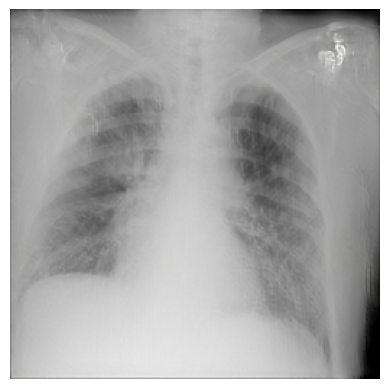

The class probabilities of the GAN approximated image are: [5.0160079e-04 9.9949837e-01]
---------------------------------------------------------------------------------


Processing Features: 100%|██████████| 2048/2048 [04:23<00:00,  7.79it/s]


Features Changed to Expected Value: 1491 out of 2048
Loss: 0.17206519842147827
Epoch: 0
Loss: 0.05395711958408356
Epoch: 4
Loss: 0.039504725486040115
Epoch: 8
Loss: 0.04076594486832619
Epoch: 12
Loss: 0.03675297647714615
Epoch: 16
Loss: 0.03485992178320885
Epoch: 20
Loss: 0.03383595868945122
Epoch: 24
Loss: 0.03306180238723755
Epoch: 28
Loss: 0.031872399151325226
Epoch: 32
Loss: 0.030415762215852737
Epoch: 36
Loss: 0.029469899833202362
Epoch: 40
Loss: 0.028992749750614166
Epoch: 44
Loss: 0.02812519669532776
Epoch: 48
Loss: 0.027881156653165817
Epoch: 52
Loss: 0.027210857719182968
Epoch: 56
Loss: 0.02684708498418331
Epoch: 60
Loss: 0.026621557772159576
Epoch: 64
Loss: 0.02647647261619568
Epoch: 68
Loss: 0.026502329856157303
Epoch: 72
Loss: 0.02747727558016777
Epoch: 76
Loss: 0.02664770558476448
Epoch: 80
Loss: 0.025807730853557587
Epoch: 84
Loss: 0.02570919506251812
Epoch: 88
Loss: 0.02554895728826523
Epoch: 92
Loss: 0.025559136644005775
Epoch: 96
Loss: 0.025571951642632484
Epoch: 100
L

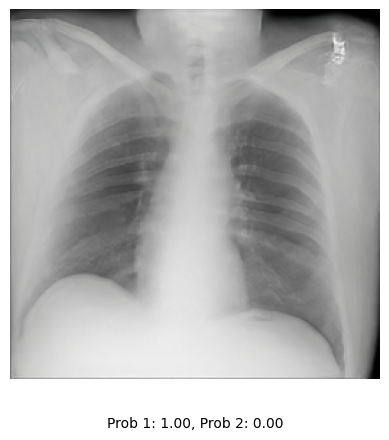

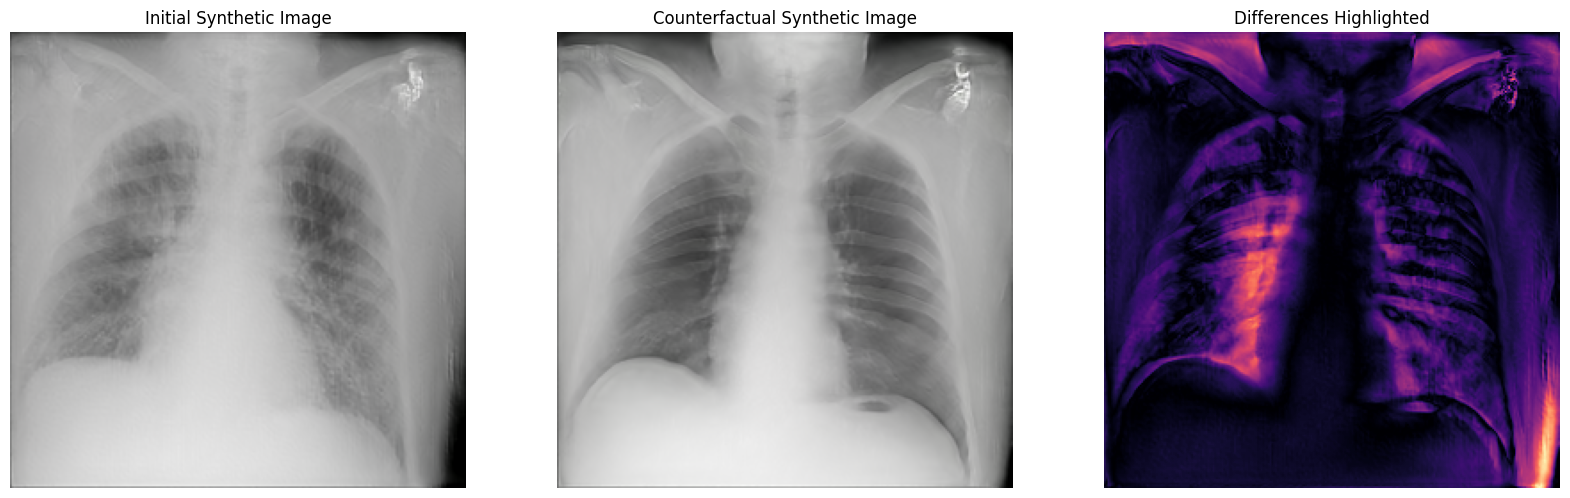

Data saved at /content/info.npz


In [19]:
%run /content/drive/MyDrive/medical_image_counterfactuals/apply_piece.py --num_classes 2 --lr 0.02 --gan_model=$gan_network --latent_vector_path "/content/drive/MyDrive/stylegan2-ada-pytorch/out/projected_w.npz" --model_type resnet50 --model_weights=$cnn_weights --class_activations=$class_activations --counterfactual_class 0 --video_path "/content/drive/MyDrive/counterfactual_transition.mp4" --info_path "/content/info.npz"

<Figure size 640x480 with 0 Axes>

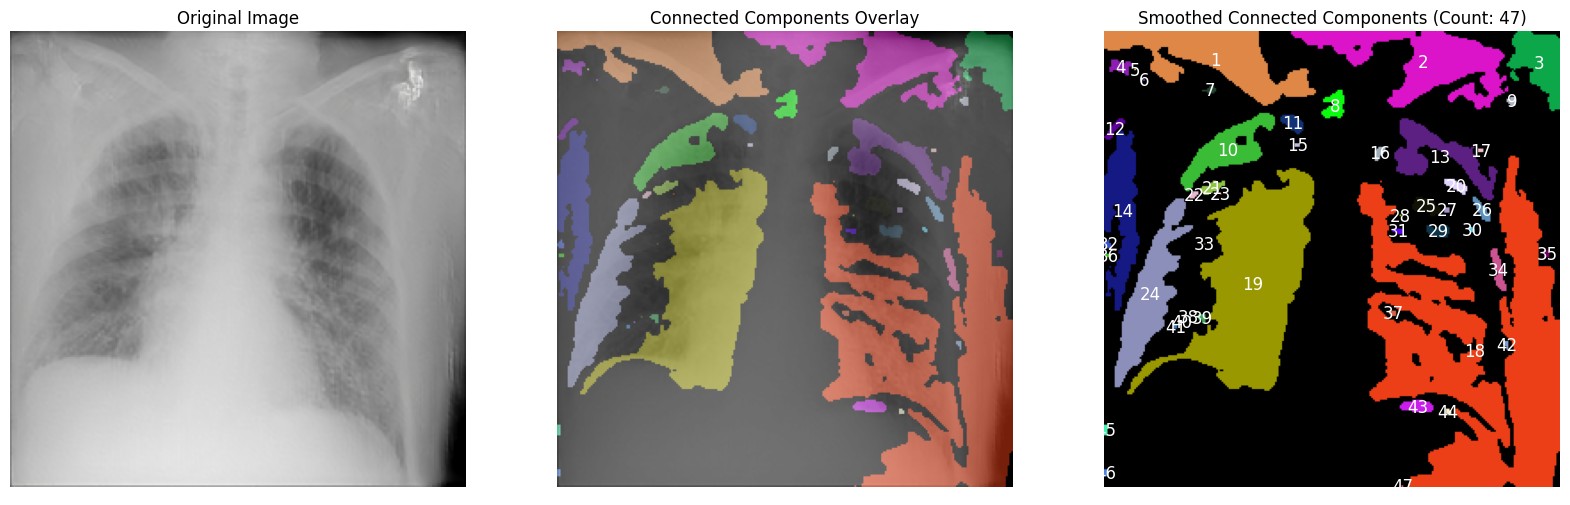

Number of connected components: 47


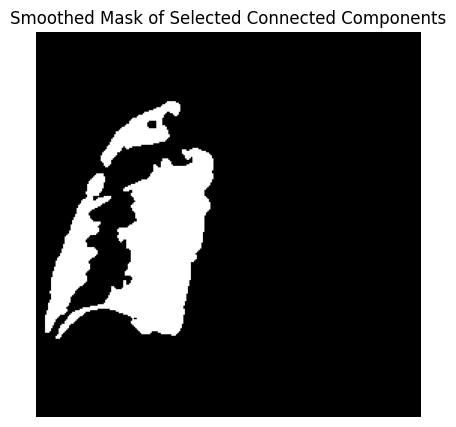

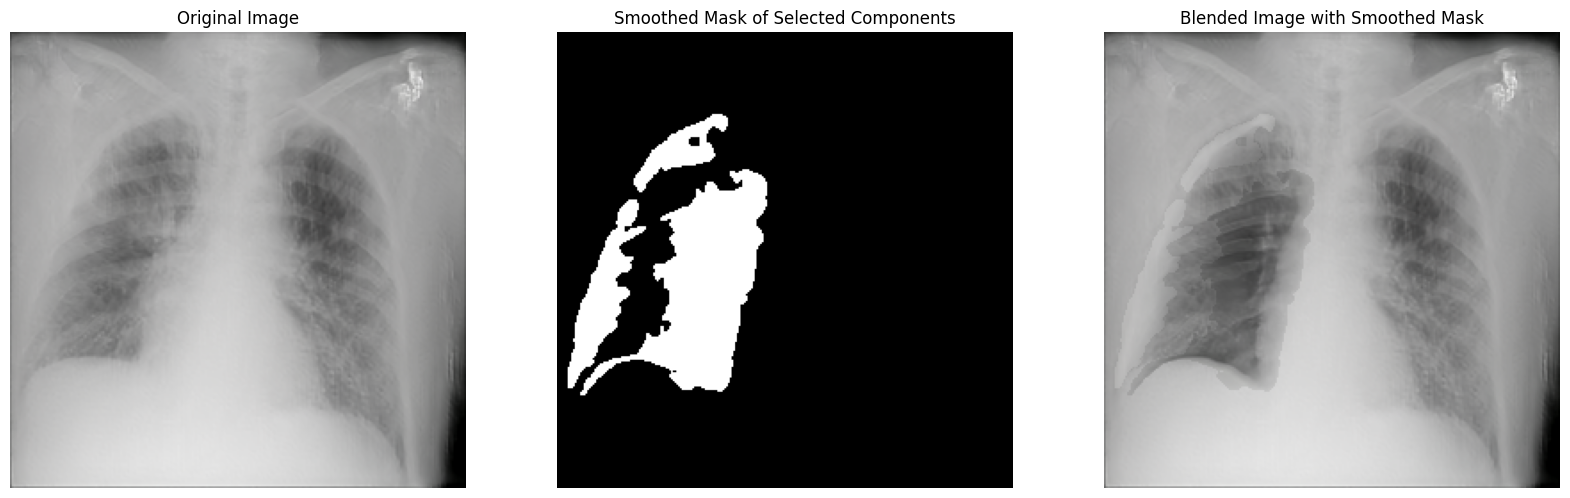

Number of selected connected components: 3
The probability scores of the CNN for the masked counterfactual image are: [0.13424362 0.8657564 ]


In [33]:
%run /content/drive/MyDrive/medical_image_counterfactuals/connected_comp.py --info_path "/content/info.npz" --n 2 --l 19 24 10  --method 2 --pixel_threshold 30 --model_type resnet50 --model_weights=$cnn_weights